In [1]:
import numpy as np
from matplotlib import pyplot as plt
from datasets import load_structure_data
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

C:\Users\hiend\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def build_model(X, y, layer_dims, activ_function="sigmoid", optim="sgd", \
                loss="mse", batch_size=None, epoc=1000, valid_data=None):
    # This returns a tensor
    num_layers = len(layer_dims)
    inputs = Input(shape=(layer_dims[0],))
    x = inputs
    for i in range(1,num_layers-1):
        # a layer instance is callable on a tensor, and returns a tensor
        x = Dense(layer_dims[i], activation=activ_function)(x)
    predictions = Dense(layer_dims[num_layers-1])(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)

    if(optim == "sgd"):
        sgd = optimizers.SGD(lr=0.01, momentum=0.9)
        model.compile(optimizer=sgd,
                      loss=loss,
                      metrics=['accuracy'])
    else:
        model.compile(optimizer=optim,
                      loss=loss,
                      metrics=['accuracy'])
        
    history = model.fit(X, y, validation_data=valid_data, epochs=epoc, batch_size=batch_size)  # starts training
#     history = model.fit(X, y, validation_split=0.2, epochs=epoc, batch_size=batch_size, shuffle=True) 
    return model, history

def plot(history, title):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
#     print(history.history['loss'])
    print(np.mean(history.history['loss']))
    print(np.mean(history.history['val_loss']))

In [3]:
# load data
# 500 trainig sets, 20% used for test.
X_train, y_train, X_test, y_test = load_structure_data(num_bars=10, num_exams=500, ele="2", scale=0.2)

# build a new model to predict struture displacement
model, history = build_model(X_train, y_train, layer_dims=[10,20,2],\
                             activ_function="sigmoid", optim="sgd", loss="mse", epoc=1000,\
                            valid_data=(X_test, y_test))
model_batch, history_batch = build_model(X_train, y_train, layer_dims=[10,20,2],\
                             activ_function="sigmoid", optim="sgd", loss="mse", epoc=1000, batch_size=80,\
                            valid_data=(X_test, y_test))


Train on 400 samples, validate on 100 samples
Epoch 1/1000
400/400 [==============================] - 0s 213us/step - loss: 0.2703 - acc: 0.4925 - val_loss: 0.1774 - val_acc: 0.9600
Epoch 2/1000
400/400 [==============================] - 0s 48us/step - loss: 0.0678 - acc: 0.3825 - val_loss: 0.0324 - val_acc: 0.0400
Epoch 3/1000
400/400 [==============================] - 0s 44us/step - loss: 0.0228 - acc: 0.7150 - val_loss: 0.0079 - val_acc: 0.8300
Epoch 4/1000
400/400 [==============================] - 0s 45us/step - loss: 0.0127 - acc: 0.2275 - val_loss: 0.0058 - val_acc: 0.4200
Epoch 5/1000
400/400 [==============================] - 0s 49us/step - loss: 0.0106 - acc: 0.7225 - val_loss: 0.0058 - val_acc: 0.3600
Epoch 6/1000
400/400 [==============================] - 0s 55us/step - loss: 0.0092 - acc: 0.3600 - val_loss: 0.0055 - val_acc: 0.6300
Epoch 7/1000
400/400 [==============================] - 0s 40us/step - loss: 0.0087 - acc: 0.5625 - val_loss: 0.0053 - val_acc: 0.4000
Epoch 8/

400/400 [==============================] - 0s 48us/step - loss: 0.0037 - acc: 0.5100 - val_loss: 0.0012 - val_acc: 0.5100
Epoch 61/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0037 - acc: 0.5500 - val_loss: 0.0012 - val_acc: 0.4800
Epoch 62/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0037 - acc: 0.4775 - val_loss: 0.0011 - val_acc: 0.5500
Epoch 63/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0036 - acc: 0.5400 - val_loss: 0.0012 - val_acc: 0.4900
Epoch 64/1000
400/400 [==============================] - ETA: 0s - loss: 8.2128e-04 - acc: 0.562 - 0s 29us/step - loss: 0.0036 - acc: 0.5000 - val_loss: 0.0011 - val_acc: 0.5600
Epoch 65/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0036 - acc: 0.5525 - val_loss: 0.0011 - val_acc: 0.4800
Epoch 66/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0036 - acc: 0.5300 - val_loss: 0.0011 - val_acc: 0.5200
Epoch 67/1000
400/40

400/400 [==============================] - 0s 30us/step - loss: 0.0031 - acc: 0.5575 - val_loss: 7.1887e-04 - val_acc: 0.5500
Epoch 119/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0031 - acc: 0.5325 - val_loss: 7.1765e-04 - val_acc: 0.5800
Epoch 120/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0031 - acc: 0.5500 - val_loss: 7.4288e-04 - val_acc: 0.5500
Epoch 121/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0031 - acc: 0.5400 - val_loss: 7.1049e-04 - val_acc: 0.5700
Epoch 122/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0030 - acc: 0.5325 - val_loss: 7.1471e-04 - val_acc: 0.5900
Epoch 123/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.5425 - val_loss: 7.0810e-04 - val_acc: 0.5400
Epoch 124/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0031 - acc: 0.5175 - val_loss: 7.0493e-04 - val_acc: 0.5800
Epoch 125/1000
400/400 [====

400/400 [==============================] - 0s 29us/step - loss: 0.0030 - acc: 0.5825 - val_loss: 6.6185e-04 - val_acc: 0.5700
Epoch 176/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0030 - acc: 0.5900 - val_loss: 6.4450e-04 - val_acc: 0.5700
Epoch 177/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0029 - acc: 0.5700 - val_loss: 6.7103e-04 - val_acc: 0.5900
Epoch 178/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0030 - acc: 0.5950 - val_loss: 6.4239e-04 - val_acc: 0.5700
Epoch 179/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0030 - acc: 0.5650 - val_loss: 6.4369e-04 - val_acc: 0.6000
Epoch 180/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0030 - acc: 0.5750 - val_loss: 7.1591e-04 - val_acc: 0.5900
Epoch 181/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0031 - acc: 0.5800 - val_loss: 7.6387e-04 - val_acc: 0.5800
Epoch 182/1000
400/400 [====

400/400 [==============================] - 0s 28us/step - loss: 0.0030 - acc: 0.6175 - val_loss: 7.2709e-04 - val_acc: 0.6500
Epoch 234/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0030 - acc: 0.6075 - val_loss: 6.4312e-04 - val_acc: 0.6800
Epoch 235/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.6050 - val_loss: 6.4875e-04 - val_acc: 0.6600
Epoch 236/1000
400/400 [==============================] - 0s 36us/step - loss: 0.0029 - acc: 0.6175 - val_loss: 6.6719e-04 - val_acc: 0.6800
Epoch 237/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.5950 - val_loss: 6.4324e-04 - val_acc: 0.6700
Epoch 238/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0030 - acc: 0.6575 - val_loss: 6.4980e-04 - val_acc: 0.6200
Epoch 239/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.5850 - val_loss: 7.1478e-04 - val_acc: 0.6900
Epoch 240/1000
400/400 [====

400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.6825 - val_loss: 6.4620e-04 - val_acc: 0.6700
Epoch 291/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.6775 - val_loss: 6.5692e-04 - val_acc: 0.7000
Epoch 292/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.6500 - val_loss: 6.5167e-04 - val_acc: 0.7200
Epoch 293/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0030 - acc: 0.6875 - val_loss: 7.7773e-04 - val_acc: 0.7300
Epoch 294/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.6525 - val_loss: 6.4062e-04 - val_acc: 0.7400
Epoch 295/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.6600 - val_loss: 6.7028e-04 - val_acc: 0.7400
Epoch 296/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0030 - acc: 0.7025 - val_loss: 6.5528e-04 - val_acc: 0.7200
Epoch 297/1000
400/400 [====

400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7200 - val_loss: 6.3363e-04 - val_acc: 0.7700
Epoch 349/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7300 - val_loss: 6.2783e-04 - val_acc: 0.7400
Epoch 350/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0030 - acc: 0.7000 - val_loss: 7.1465e-04 - val_acc: 0.8000
Epoch 351/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0030 - acc: 0.7025 - val_loss: 6.7579e-04 - val_acc: 0.7500
Epoch 352/1000
400/400 [==============================] - 0s 41us/step - loss: 0.0030 - acc: 0.7375 - val_loss: 6.4020e-04 - val_acc: 0.7300
Epoch 353/1000
400/400 [==============================] - 0s 43us/step - loss: 0.0029 - acc: 0.7275 - val_loss: 6.2978e-04 - val_acc: 0.7400
Epoch 354/1000
400/400 [==============================] - 0s 36us/step - loss: 0.0029 - acc: 0.7100 - val_loss: 6.2816e-04 - val_acc: 0.7400
Epoch 355/1000
400/400 [====

400/400 [==============================] - 0s 36us/step - loss: 0.0029 - acc: 0.7075 - val_loss: 6.5157e-04 - val_acc: 0.7700
Epoch 407/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0029 - acc: 0.7425 - val_loss: 6.2573e-04 - val_acc: 0.7600
Epoch 408/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7350 - val_loss: 6.2640e-04 - val_acc: 0.7800
Epoch 409/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7800 - val_loss: 6.5255e-04 - val_acc: 0.7600
Epoch 410/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7200 - val_loss: 6.4201e-04 - val_acc: 0.7700
Epoch 411/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7475 - val_loss: 6.4217e-04 - val_acc: 0.7600
Epoch 412/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.7375 - val_loss: 6.3680e-04 - val_acc: 0.7700
Epoch 413/1000
400/400 [====

Epoch 464/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7375 - val_loss: 6.3137e-04 - val_acc: 0.7700
Epoch 465/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7475 - val_loss: 6.2677e-04 - val_acc: 0.7600
Epoch 466/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0029 - acc: 0.7575 - val_loss: 6.4012e-04 - val_acc: 0.7700
Epoch 467/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7575 - val_loss: 6.2704e-04 - val_acc: 0.7600
Epoch 468/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0029 - acc: 0.7425 - val_loss: 6.2738e-04 - val_acc: 0.7600
Epoch 469/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7850 - val_loss: 6.2618e-04 - val_acc: 0.7600
Epoch 470/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7125 - val_loss: 6.6845e-04 - val_acc: 0.8000
Epoch 471/100

400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7600 - val_loss: 6.4872e-04 - val_acc: 0.7700
Epoch 523/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7500 - val_loss: 6.2875e-04 - val_acc: 0.7700
Epoch 524/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7825 - val_loss: 6.3524e-04 - val_acc: 0.7700
Epoch 525/1000
400/400 [==============================] - 0s 36us/step - loss: 0.0029 - acc: 0.7275 - val_loss: 6.5012e-04 - val_acc: 0.7700
Epoch 526/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7775 - val_loss: 6.3435e-04 - val_acc: 0.7700
Epoch 527/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7250 - val_loss: 6.3868e-04 - val_acc: 0.7700
Epoch 528/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7700 - val_loss: 6.4617e-04 - val_acc: 0.7600
Epoch 529/1000
400/400 [====

400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7825 - val_loss: 6.3022e-04 - val_acc: 0.7700
Epoch 581/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.7425 - val_loss: 6.4547e-04 - val_acc: 0.7700
Epoch 582/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0029 - acc: 0.7825 - val_loss: 6.4452e-04 - val_acc: 0.7700
Epoch 583/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0029 - acc: 0.7225 - val_loss: 6.4884e-04 - val_acc: 0.8000
Epoch 584/1000
400/400 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.7950 - val_loss: 6.4288e-04 - val_acc: 0.7700
Epoch 585/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7325 - val_loss: 6.4556e-04 - val_acc: 0.7700
Epoch 586/1000
400/400 [==============================] - 0s 36us/step - loss: 0.0029 - acc: 0.7625 - val_loss: 6.3397e-04 - val_acc: 0.7700
Epoch 587/1000
400/400 [====

400/400 [==============================] - 0s 45us/step - loss: 0.0030 - acc: 0.7350 - val_loss: 6.5197e-04 - val_acc: 0.7700
Epoch 639/1000
400/400 [==============================] - 0s 41us/step - loss: 0.0029 - acc: 0.8200 - val_loss: 6.5653e-04 - val_acc: 0.7700
Epoch 640/1000
400/400 [==============================] - 0s 39us/step - loss: 0.0029 - acc: 0.7075 - val_loss: 6.5236e-04 - val_acc: 0.7800
Epoch 641/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0029 - acc: 0.7825 - val_loss: 6.5065e-04 - val_acc: 0.7700
Epoch 642/1000
400/400 [==============================] - 0s 36us/step - loss: 0.0030 - acc: 0.7550 - val_loss: 7.4510e-04 - val_acc: 0.7800
Epoch 643/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7400 - val_loss: 6.7050e-04 - val_acc: 0.7800
Epoch 644/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7475 - val_loss: 6.7547e-04 - val_acc: 0.7700
Epoch 645/1000
400/400 [====

400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7400 - val_loss: 6.5075e-04 - val_acc: 0.7800
Epoch 697/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.7925 - val_loss: 6.5071e-04 - val_acc: 0.7800
Epoch 698/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7325 - val_loss: 6.6344e-04 - val_acc: 0.7800
Epoch 699/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7650 - val_loss: 6.5016e-04 - val_acc: 0.7700
Epoch 700/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.7450 - val_loss: 6.9907e-04 - val_acc: 0.7800
Epoch 701/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7375 - val_loss: 6.4270e-04 - val_acc: 0.7800
Epoch 702/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7725 - val_loss: 6.4942e-04 - val_acc: 0.7800
Epoch 703/1000
400/400 [====

Epoch 754/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7775 - val_loss: 6.9300e-04 - val_acc: 0.7700
Epoch 755/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7475 - val_loss: 7.2866e-04 - val_acc: 0.8000
Epoch 756/1000
400/400 [==============================] - 0s 41us/step - loss: 0.0031 - acc: 0.7625 - val_loss: 6.9060e-04 - val_acc: 0.7500
Epoch 757/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0030 - acc: 0.7850 - val_loss: 7.8594e-04 - val_acc: 0.7800
Epoch 758/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7150 - val_loss: 6.4832e-04 - val_acc: 0.7700
Epoch 759/1000
400/400 [==============================] - 0s 39us/step - loss: 0.0029 - acc: 0.7825 - val_loss: 7.1658e-04 - val_acc: 0.7900
Epoch 760/1000
400/400 [==============================] - 0s 35us/step - loss: 0.0030 - acc: 0.7425 - val_loss: 6.8457e-04 - val_acc: 0.7700
Epoch 761/100

400/400 [==============================] - 0s 33us/step - loss: 0.0029 - acc: 0.7575 - val_loss: 6.2998e-04 - val_acc: 0.7700
Epoch 813/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7675 - val_loss: 6.3858e-04 - val_acc: 0.7700
Epoch 814/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0029 - acc: 0.7850 - val_loss: 6.5215e-04 - val_acc: 0.7700
Epoch 815/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7300 - val_loss: 6.3241e-04 - val_acc: 0.7800
Epoch 816/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7500 - val_loss: 6.4382e-04 - val_acc: 0.7800
Epoch 817/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7750 - val_loss: 6.2504e-04 - val_acc: 0.7700
Epoch 818/1000
400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7550 - val_loss: 6.3972e-04 - val_acc: 0.7800
Epoch 819/1000
400/400 [====

400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.8000 - val_loss: 6.4346e-04 - val_acc: 0.7700
Epoch 871/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7775 - val_loss: 6.2410e-04 - val_acc: 0.7700
Epoch 872/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7225 - val_loss: 6.2602e-04 - val_acc: 0.7800
Epoch 873/1000
400/400 [==============================] - 0s 25us/step - loss: 0.0029 - acc: 0.7575 - val_loss: 6.2990e-04 - val_acc: 0.7800
Epoch 874/1000
400/400 [==============================] - 0s 25us/step - loss: 0.0029 - acc: 0.7950 - val_loss: 6.2551e-04 - val_acc: 0.7800
Epoch 875/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7525 - val_loss: 6.1970e-04 - val_acc: 0.7700
Epoch 876/1000
400/400 [==============================] - 0s 31us/step - loss: 0.0029 - acc: 0.7425 - val_loss: 6.1682e-04 - val_acc: 0.7800
Epoch 877/1000
400/400 [====

400/400 [==============================] - 0s 29us/step - loss: 0.0029 - acc: 0.7375 - val_loss: 6.2331e-04 - val_acc: 0.7700
Epoch 929/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7725 - val_loss: 6.2313e-04 - val_acc: 0.7700
Epoch 930/1000
400/400 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 0.7375 - val_loss: 6.2786e-04 - val_acc: 0.7900
Epoch 931/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0029 - acc: 0.7975 - val_loss: 6.2407e-04 - val_acc: 0.7700
Epoch 932/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7475 - val_loss: 6.1836e-04 - val_acc: 0.8000
Epoch 933/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7550 - val_loss: 6.3752e-04 - val_acc: 0.7700
Epoch 934/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0028 - acc: 0.7550 - val_loss: 6.4830e-04 - val_acc: 0.7700
Epoch 935/1000
400/400 [====

Epoch 986/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7350 - val_loss: 6.2522e-04 - val_acc: 0.7700
Epoch 987/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7900 - val_loss: 6.2387e-04 - val_acc: 0.7700
Epoch 988/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.7275 - val_loss: 6.2395e-04 - val_acc: 0.7700
Epoch 989/1000
400/400 [==============================] - 0s 26us/step - loss: 0.0028 - acc: 0.7550 - val_loss: 6.3560e-04 - val_acc: 0.7900
Epoch 990/1000
400/400 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.7875 - val_loss: 6.2347e-04 - val_acc: 0.7700
Epoch 991/1000
400/400 [==============================] - 0s 43us/step - loss: 0.0029 - acc: 0.7325 - val_loss: 6.6138e-04 - val_acc: 0.8000
Epoch 992/1000
400/400 [==============================] - 0s 45us/step - loss: 0.0029 - acc: 0.8000 - val_loss: 6.2054e-04 - val_acc: 0.7700
Epoch 993/100

400/400 [==============================] - 0s 39us/step - loss: 0.0062 - acc: 0.5100 - val_loss: 0.0033 - val_acc: 0.5700
Epoch 46/1000
400/400 [==============================] - 0s 41us/step - loss: 0.0062 - acc: 0.5050 - val_loss: 0.0032 - val_acc: 0.5700
Epoch 47/1000
400/400 [==============================] - 0s 40us/step - loss: 0.0061 - acc: 0.5075 - val_loss: 0.0032 - val_acc: 0.5700
Epoch 48/1000
400/400 [==============================] - 0s 45us/step - loss: 0.0061 - acc: 0.5125 - val_loss: 0.0032 - val_acc: 0.5800
Epoch 49/1000
400/400 [==============================] - 0s 46us/step - loss: 0.0061 - acc: 0.5125 - val_loss: 0.0031 - val_acc: 0.5700
Epoch 50/1000
400/400 [==============================] - 0s 33us/step - loss: 0.0060 - acc: 0.4975 - val_loss: 0.0031 - val_acc: 0.5700
Epoch 51/1000
400/400 [==============================] - 0s 30us/step - loss: 0.0060 - acc: 0.5050 - val_loss: 0.0031 - val_acc: 0.5800
Epoch 52/1000
400/400 [==============================] - 0s 25

400/400 [==============================] - 0s 15us/step - loss: 0.0045 - acc: 0.5025 - val_loss: 0.0018 - val_acc: 0.5600
Epoch 106/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0045 - acc: 0.5100 - val_loss: 0.0018 - val_acc: 0.5600
Epoch 107/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0045 - acc: 0.5225 - val_loss: 0.0018 - val_acc: 0.5600
Epoch 108/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0045 - acc: 0.5175 - val_loss: 0.0018 - val_acc: 0.5600
Epoch 109/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0045 - acc: 0.5125 - val_loss: 0.0017 - val_acc: 0.5600
Epoch 110/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0045 - acc: 0.5150 - val_loss: 0.0017 - val_acc: 0.5600
Epoch 111/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0044 - acc: 0.5175 - val_loss: 0.0017 - val_acc: 0.5600
Epoch 112/1000
400/400 [==============================] 

400/400 [==============================] - 0s 20us/step - loss: 0.0038 - acc: 0.5225 - val_loss: 0.0012 - val_acc: 0.5700
Epoch 165/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 0.5275 - val_loss: 0.0012 - val_acc: 0.5700
Epoch 166/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 0.5200 - val_loss: 0.0012 - val_acc: 0.5600
Epoch 167/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 0.5150 - val_loss: 0.0012 - val_acc: 0.5700
Epoch 168/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 0.5250 - val_loss: 0.0012 - val_acc: 0.5700
Epoch 169/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0038 - acc: 0.5375 - val_loss: 0.0012 - val_acc: 0.5800
Epoch 170/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0038 - acc: 0.5375 - val_loss: 0.0012 - val_acc: 0.5700
Epoch 171/1000
400/400 [==============================] 

400/400 [==============================] - 0s 14us/step - loss: 0.0035 - acc: 0.5400 - val_loss: 8.9685e-04 - val_acc: 0.5900
Epoch 224/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0035 - acc: 0.5450 - val_loss: 9.0014e-04 - val_acc: 0.5600
Epoch 225/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0035 - acc: 0.5400 - val_loss: 9.0389e-04 - val_acc: 0.5600
Epoch 226/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0035 - acc: 0.5250 - val_loss: 8.8626e-04 - val_acc: 0.5600
Epoch 227/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0035 - acc: 0.5200 - val_loss: 8.9611e-04 - val_acc: 0.5600
Epoch 228/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0035 - acc: 0.5350 - val_loss: 8.8975e-04 - val_acc: 0.5700
Epoch 229/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0035 - acc: 0.5400 - val_loss: 8.7293e-04 - val_acc: 0.5600
Epoch 230/1000
400/400 [====

400/400 [==============================] - 0s 14us/step - loss: 0.0033 - acc: 0.5225 - val_loss: 7.4991e-04 - val_acc: 0.5600
Epoch 282/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0033 - acc: 0.5300 - val_loss: 7.4607e-04 - val_acc: 0.5900
Epoch 283/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0033 - acc: 0.5425 - val_loss: 7.5780e-04 - val_acc: 0.5800
Epoch 284/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0033 - acc: 0.5400 - val_loss: 7.5590e-04 - val_acc: 0.5900
Epoch 285/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0033 - acc: 0.5400 - val_loss: 7.4087e-04 - val_acc: 0.5700
Epoch 286/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0033 - acc: 0.5375 - val_loss: 7.5100e-04 - val_acc: 0.5800
Epoch 287/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0033 - acc: 0.5300 - val_loss: 7.4301e-04 - val_acc: 0.5700
Epoch 288/1000
400/400 [====

400/400 [==============================] - 0s 19us/step - loss: 0.0032 - acc: 0.5450 - val_loss: 6.8085e-04 - val_acc: 0.6100
Epoch 340/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0032 - acc: 0.5350 - val_loss: 6.7459e-04 - val_acc: 0.5600
Epoch 341/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0032 - acc: 0.5275 - val_loss: 6.7318e-04 - val_acc: 0.5700
Epoch 342/1000
400/400 [==============================] - 0s 19us/step - loss: 0.0032 - acc: 0.5275 - val_loss: 6.6731e-04 - val_acc: 0.5700
Epoch 343/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0032 - acc: 0.5375 - val_loss: 6.7120e-04 - val_acc: 0.5800
Epoch 344/1000
400/400 [==============================] - 0s 21us/step - loss: 0.0032 - acc: 0.5350 - val_loss: 6.7570e-04 - val_acc: 0.5700
Epoch 345/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0032 - acc: 0.5375 - val_loss: 6.6373e-04 - val_acc: 0.5900
Epoch 346/1000
400/400 [====

Epoch 397/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0031 - acc: 0.5300 - val_loss: 6.2988e-04 - val_acc: 0.5900
Epoch 398/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0031 - acc: 0.5275 - val_loss: 6.2923e-04 - val_acc: 0.5900
Epoch 399/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0031 - acc: 0.5350 - val_loss: 6.3304e-04 - val_acc: 0.6400
Epoch 400/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0031 - acc: 0.5375 - val_loss: 6.3426e-04 - val_acc: 0.6000
Epoch 401/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0031 - acc: 0.5375 - val_loss: 6.2545e-04 - val_acc: 0.6200
Epoch 402/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0031 - acc: 0.5300 - val_loss: 6.2313e-04 - val_acc: 0.5800
Epoch 403/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0031 - acc: 0.5300 - val_loss: 6.4210e-04 - val_acc: 0.6200
Epoch 404/100

400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5350 - val_loss: 6.0432e-04 - val_acc: 0.6000
Epoch 456/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5350 - val_loss: 6.0431e-04 - val_acc: 0.6000
Epoch 457/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5400 - val_loss: 6.0820e-04 - val_acc: 0.6200
Epoch 458/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5450 - val_loss: 6.1484e-04 - val_acc: 0.6200
Epoch 459/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5425 - val_loss: 6.0344e-04 - val_acc: 0.6200
Epoch 460/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5400 - val_loss: 6.0337e-04 - val_acc: 0.5800
Epoch 461/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5300 - val_loss: 6.1674e-04 - val_acc: 0.5800
Epoch 462/1000
400/400 [====

400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5325 - val_loss: 5.9490e-04 - val_acc: 0.5800
Epoch 514/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5300 - val_loss: 6.0212e-04 - val_acc: 0.5800
Epoch 515/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5350 - val_loss: 5.9737e-04 - val_acc: 0.6000
Epoch 516/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5425 - val_loss: 5.9281e-04 - val_acc: 0.6000
Epoch 517/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5450 - val_loss: 6.0225e-04 - val_acc: 0.5800
Epoch 518/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5350 - val_loss: 5.9721e-04 - val_acc: 0.5800
Epoch 519/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0030 - acc: 0.5300 - val_loss: 5.9911e-04 - val_acc: 0.5800
Epoch 520/1000
400/400 [====

400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5500 - val_loss: 5.9192e-04 - val_acc: 0.5800
Epoch 572/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5575 - val_loss: 5.9640e-04 - val_acc: 0.5800
Epoch 573/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0030 - acc: 0.5625 - val_loss: 5.9155e-04 - val_acc: 0.5800
Epoch 574/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0030 - acc: 0.5525 - val_loss: 5.9409e-04 - val_acc: 0.5800
Epoch 575/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0030 - acc: 0.5575 - val_loss: 5.8969e-04 - val_acc: 0.5800
Epoch 576/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0030 - acc: 0.5575 - val_loss: 6.0326e-04 - val_acc: 0.5800
Epoch 577/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5600 - val_loss: 5.9478e-04 - val_acc: 0.5800
Epoch 578/1000
400/400 [====

400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5775 - val_loss: 5.8973e-04 - val_acc: 0.5900
Epoch 629/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5650 - val_loss: 6.0070e-04 - val_acc: 0.5900
Epoch 630/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5600 - val_loss: 5.9121e-04 - val_acc: 0.5800
Epoch 631/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5575 - val_loss: 5.9002e-04 - val_acc: 0.5900
Epoch 632/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5850 - val_loss: 5.9331e-04 - val_acc: 0.6100
Epoch 633/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5800 - val_loss: 6.0187e-04 - val_acc: 0.5900
Epoch 634/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0030 - acc: 0.5625 - val_loss: 5.9809e-04 - val_acc: 0.5800
Epoch 635/1000
400/400 [====

400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5975 - val_loss: 5.9286e-04 - val_acc: 0.6200
Epoch 687/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0030 - acc: 0.6000 - val_loss: 5.9638e-04 - val_acc: 0.6000
Epoch 688/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0030 - acc: 0.5650 - val_loss: 6.0125e-04 - val_acc: 0.5800
Epoch 689/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0030 - acc: 0.5650 - val_loss: 5.9291e-04 - val_acc: 0.6100
Epoch 690/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0030 - acc: 0.5900 - val_loss: 5.9616e-04 - val_acc: 0.5900
Epoch 691/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.5775 - val_loss: 5.9584e-04 - val_acc: 0.5900
Epoch 692/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.5700 - val_loss: 5.9687e-04 - val_acc: 0.5800
Epoch 693/1000
400/400 [====

400/400 [==============================] - 0s 18us/step - loss: 0.0029 - acc: 0.5800 - val_loss: 5.9717e-04 - val_acc: 0.6000
Epoch 745/1000
400/400 [==============================] - 0s 21us/step - loss: 0.0029 - acc: 0.5975 - val_loss: 5.9852e-04 - val_acc: 0.6000
Epoch 746/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.5775 - val_loss: 6.0896e-04 - val_acc: 0.6000
Epoch 747/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.5725 - val_loss: 5.9854e-04 - val_acc: 0.6000
Epoch 748/1000
400/400 [==============================] - 0s 20us/step - loss: 0.0029 - acc: 0.5975 - val_loss: 5.9723e-04 - val_acc: 0.6200
Epoch 749/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.5975 - val_loss: 5.9968e-04 - val_acc: 0.6000
Epoch 750/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0029 - acc: 0.5625 - val_loss: 6.0286e-04 - val_acc: 0.5800
Epoch 751/1000
400/400 [====

Epoch 802/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.5675 - val_loss: 6.0941e-04 - val_acc: 0.6000
Epoch 803/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.5800 - val_loss: 6.0836e-04 - val_acc: 0.6100
Epoch 804/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.5925 - val_loss: 6.0136e-04 - val_acc: 0.6300
Epoch 805/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.5900 - val_loss: 6.0219e-04 - val_acc: 0.6100
Epoch 806/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.5850 - val_loss: 6.1023e-04 - val_acc: 0.6000
Epoch 807/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.5850 - val_loss: 6.0438e-04 - val_acc: 0.6100
Epoch 808/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0029 - acc: 0.5850 - val_loss: 6.0774e-04 - val_acc: 0.6100
Epoch 809/100

Epoch 860/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.5875 - val_loss: 6.1675e-04 - val_acc: 0.6300
Epoch 861/1000
400/400 [==============================] - 0s 23us/step - loss: 0.0029 - acc: 0.6025 - val_loss: 6.0971e-04 - val_acc: 0.6400
Epoch 862/1000
400/400 [==============================] - 0s 23us/step - loss: 0.0029 - acc: 0.6275 - val_loss: 6.0664e-04 - val_acc: 0.6400
Epoch 863/1000
400/400 [==============================] - 0s 21us/step - loss: 0.0029 - acc: 0.6000 - val_loss: 6.0685e-04 - val_acc: 0.6200
Epoch 864/1000
400/400 [==============================] - 0s 21us/step - loss: 0.0029 - acc: 0.5800 - val_loss: 6.0731e-04 - val_acc: 0.6100
Epoch 865/1000
400/400 [==============================] - 0s 20us/step - loss: 0.0029 - acc: 0.5825 - val_loss: 6.1648e-04 - val_acc: 0.6300
Epoch 866/1000
400/400 [==============================] - 0s 19us/step - loss: 0.0029 - acc: 0.6050 - val_loss: 6.0870e-04 - val_acc: 0.6400
Epoch 867/100

Epoch 918/1000
400/400 [==============================] - 0s 18us/step - loss: 0.0029 - acc: 0.6000 - val_loss: 6.2514e-04 - val_acc: 0.6400
Epoch 919/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6000 - val_loss: 6.1463e-04 - val_acc: 0.6400
Epoch 920/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0029 - acc: 0.6125 - val_loss: 6.1182e-04 - val_acc: 0.6500
Epoch 921/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.6100 - val_loss: 6.1280e-04 - val_acc: 0.6400
Epoch 922/1000
400/400 [==============================] - 0s 13us/step - loss: 0.0029 - acc: 0.6000 - val_loss: 6.2488e-04 - val_acc: 0.6200
Epoch 923/1000
400/400 [==============================] - 0s 15us/step - loss: 0.0029 - acc: 0.6000 - val_loss: 6.1970e-04 - val_acc: 0.6400
Epoch 924/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6075 - val_loss: 6.1171e-04 - val_acc: 0.6500
Epoch 925/100

Epoch 976/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6075 - val_loss: 6.1635e-04 - val_acc: 0.6500
Epoch 977/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6175 - val_loss: 6.1601e-04 - val_acc: 0.6600
Epoch 978/1000
400/400 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 0.6175 - val_loss: 6.1658e-04 - val_acc: 0.6500
Epoch 979/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6150 - val_loss: 6.2820e-04 - val_acc: 0.6500
Epoch 980/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6175 - val_loss: 6.2533e-04 - val_acc: 0.6500
Epoch 981/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6200 - val_loss: 6.1649e-04 - val_acc: 0.6600
Epoch 982/1000
400/400 [==============================] - 0s 14us/step - loss: 0.0029 - acc: 0.6125 - val_loss: 6.1689e-04 - val_acc: 0.6500
Epoch 983/100

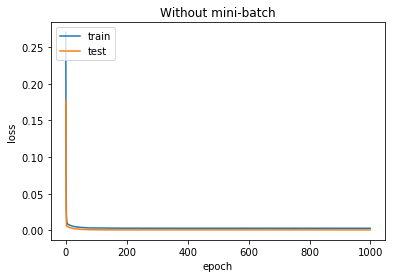

0.0034508088329114257
0.0009932382284698542


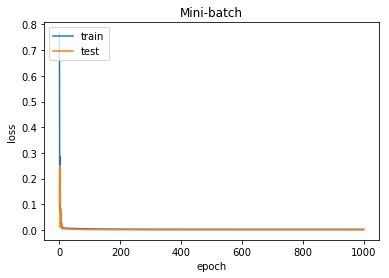

0.004780375479091891
0.0016326210498344156


In [4]:
plot(history, "Without mini-batch")
plot(history_batch, "Mini-batch")